In [1]:
import pandas as pd
%config Completer.use_jedi = False

In [2]:
df = pd.read_csv('./winequality-red.csv')

In [3]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
quality_mapping = {x:x-3 for x in range(3,9)}

In [5]:
quality_mapping

{3: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5}

In [6]:
df.loc[:,'quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [7]:
df.loc[:,'quality'] = df.quality.map(quality_mapping)

In [8]:
df.loc[:,'quality'].value_counts()

2    681
3    638
4    199
1     53
5     18
0     10
Name: quality, dtype: int64

In [12]:
# use sample with frac=1 to shuffle the dataframe
# we reset the indices since they change after
# shuffling the dataframe
df = df.sample(frac=1).reset_index(drop=True)

In [14]:
df_train = df.head(1000)
df_test = df.tail(599)

In [16]:
from sklearn import tree
from sklearn import metrics

In [30]:
clf = tree.DecisionTreeClassifier(max_depth=7)

In [31]:
cols = ['fixed acidity','volatile acidity','citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

In [32]:
clf.fit(df_train[cols],df_train.quality)

DecisionTreeClassifier(max_depth=7)

In [33]:
# generate predictions on the training set
train_predictions = clf.predict(df_train[cols])


In [34]:
test_predictions = clf.predict(df_test[cols])

In [35]:
train_accuracy = metrics.accuracy_score(
df_train.quality, train_predictions )
# calculate the accuracy of predictions on
# test data set
test_accuracy = metrics.accuracy_score(
df_test.quality, test_predictions )

In [36]:
train_accuracy

0.772

In [37]:
test_accuracy

0.5442404006677797

In [10]:

# import scikit-learn tree and metrics
from sklearn import tree 
from sklearn import metrics
# import matplotlib and seaborn # for plotting
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns

In [41]:

# this is our global size of label text # on the plots
matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)

In [42]:
# This line ensures that the plot is displayed # inside the notebook
%matplotlib inline

In [48]:
train_accuracies = [0.5] 
test_accuracies = [0.5]

In [49]:
for depth in range(1,25):
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf.fit(df_train[cols],df_train.quality)
    train_predictions= clf.predict(df_train[cols])
    test_predictions = clf.predict(df_test[cols])
    
    train_accuracy = metrics.accuracy_score(df_train.quality, train_predictions)
    test_accuracy = metrics.accuracy_score(df_test.quality, test_predictions)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

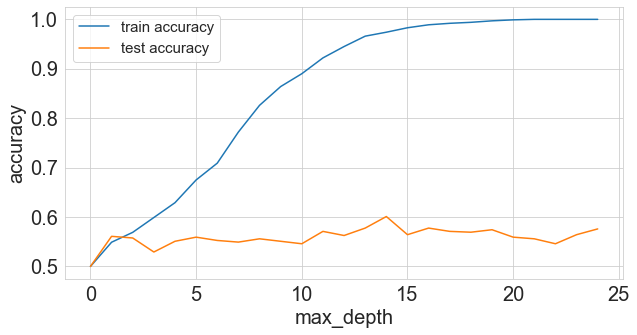

In [50]:
plt.figure(figsize=(10,5))
sns.set_style('whitegrid')
plt.plot(train_accuracies,label='train accuracy')
plt.plot(test_accuracies,label='test accuracy')
plt.legend(loc='upper left', prop={'size':15})
plt.xticks(range(0,26,5))
plt.xlabel('max_depth',size=20)
plt.ylabel('accuracy',size=20)
plt.show()

## Distribution of labels

Text(0, 0.5, 'count')

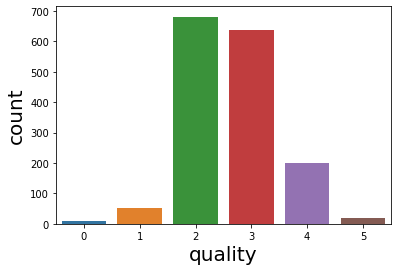

In [12]:
b = sns.countplot(x='quality', data = df)
b.set_xlabel('quality',fontsize=20)
b.set_ylabel('count',fontsize=20)